# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

1.0


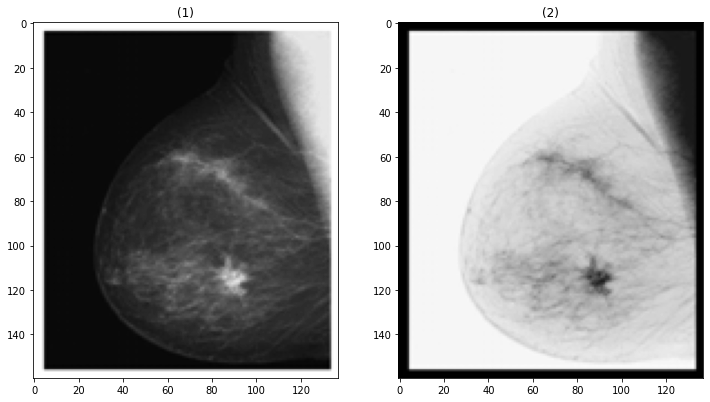

In [3]:
'''
1
Negative Transformation
'''
def negative_transformation(img,threshold=255):
    return threshold-img
    
img=io.imread("imgs/Picture1.png", as_gray=True)
print(np.max(img))
new_img=negative_transformation(img)
show_images([img,new_img])

[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]
 ...
 [0.99607843 0.99607843 1.         ... 0.65601804 1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.91260941 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]]
1.0
[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]
 ...
 [0.99607843 0.99607843 1.         ... 0.65601804 1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.91260941 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]]


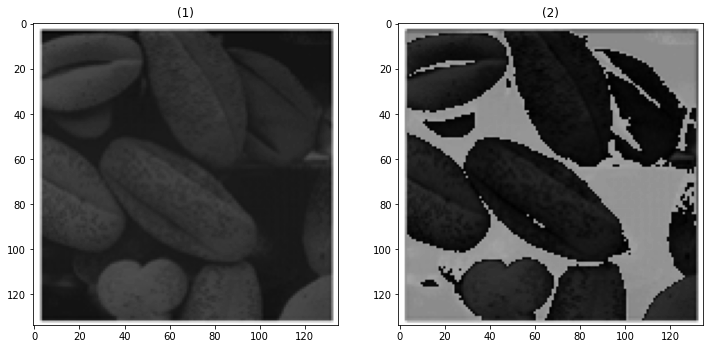

In [4]:
'''
2
Contrast Enhancement
'''
def contrast_enhancement(img):
    return ((1.5*img+(50/255))*(img<=(100/255)))+((img>(100/255))*img)
img=io.imread("imgs/Picture2.png", as_gray=True)
print(img)
print(np.max(img))
new_img=contrast_enhancement(img)
print(new_img)
show_images([img,new_img])


[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]
 ...
 [0.99607843 0.99607843 1.         ... 0.65601804 1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.91260941 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]]
1.0
[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]
 ...
 [0.99607843 0.99607843 1.         ... 0.65601804 1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.91260941 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]]


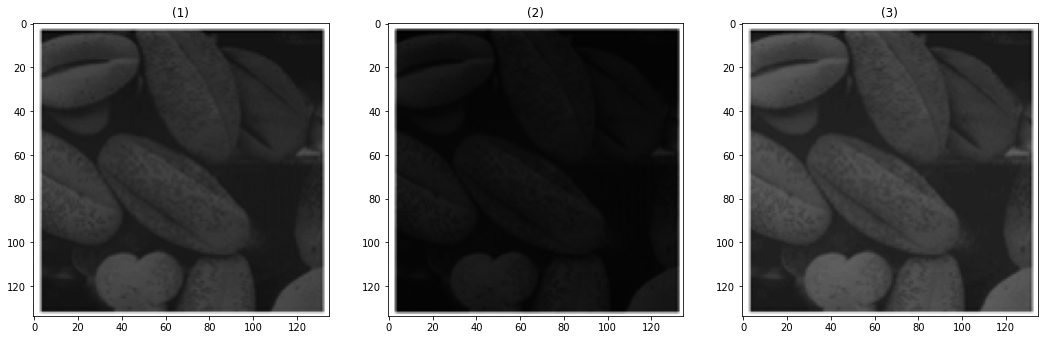

In [5]:
'''
3
Gamma Correction
'''
def gamma_correction(img,gamma=3,c=1):
    return c*(img**gamma)
    
img=io.imread("imgs/Picture2.png", as_gray=True)
print(img)
print(np.max(img))
new_img_1=gamma_correction(img)
print(new_img)
new_img_2=gamma_correction(img,gamma=0.5,c=1)
show_images([img,new_img_1,new_img_2])


In [6]:

'''Experiment 4: Histogram Equalization [40 minutes]
• Write a function to perform histogram equalization to the image .
• Read, display the image and its histogram before and after equalization, and observe the effect on image contrast. Use the image pout, tire.
To perform equalization, code the following steps:
a. For an NxM image with G gray-levels, create an array H with a length G initialized by Zeros.
b. Calculate the histogram of gray-levels for the image.
c. Form the cumulative image histogram, H_c. The cumulative histogram tells you how many pixels have gray-levels less than or equal to the p-th gray level. The calculation is:
H_c[0] = H[0] then: H_c[p] = H_c[p-1] + H[p]
d. Set the mapping between gray-levels as:
q = T[p] = round((G – 1) * H_c[p] /(N * M))
e. Go through the images, pixel-by-pixel and write an output image with the gray-levels g_q using the mapping from step 4.'''

'Experiment 4: Histogram Equalization [40 minutes]\n• Write a function to perform histogram equalization to the image .\n• Read, display the image and its histogram before and after equalization, and observe the effect on image contrast. Use the image pout, tire.\nTo perform equalization, code the following steps:\na. For an NxM image with G gray-levels, create an array H with a length G initialized by Zeros.\nb. Calculate the histogram of gray-levels for the image.\nc. Form the cumulative image histogram, H_c. The cumulative histogram tells you how many pixels have gray-levels less than or equal to the p-th gray level. The calculation is:\nH_c[0] = H[0] then: H_c[p] = H_c[p-1] + H[p]\nd. Set the mapping between gray-levels as:\nq = T[p] = round((G – 1) * H_c[p] /(N * M))\ne. Go through the images, pixel-by-pixel and write an output image with the gray-levels g_q using the mapping from step 4.'

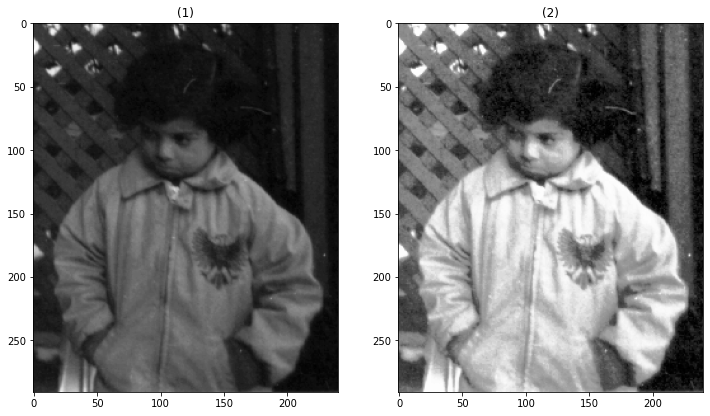

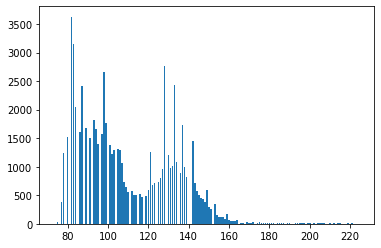

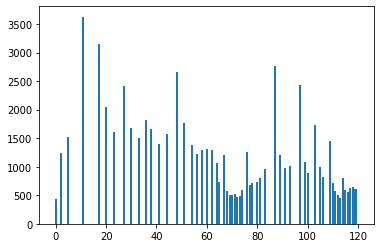

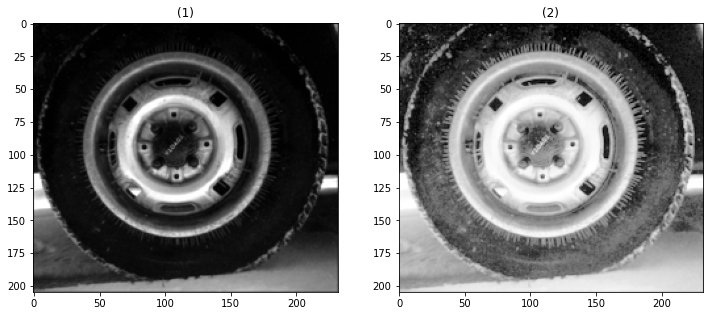

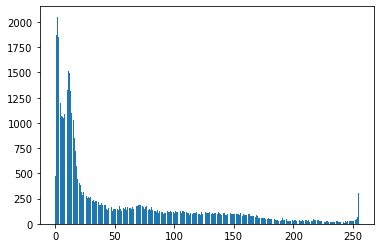

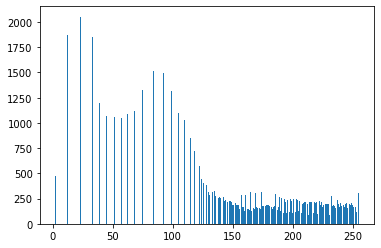

In [25]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
import collections
def getImageWithHist(name,ext=None,nbins=256):
    prev_img= io.imread(name, as_gray=True)
    img=prev_img.copy()
    #print(img.shape)
    grey_levels=np.unique(img)
    H=np.zeros(grey_levels.shape)
    #print(grey_levels.shape[0])
    y=dict()
    for row in img:
        for pixel in row:
            found=y.get(pixel,-1)
            if found !=-1:
                y[pixel]=found+1 
            else: 
                y[pixel]=1
    #print("hehhhhhhhhhhhhhhh")
    z = collections.OrderedDict(sorted(y.items()))
    prev=0
    #print(z)
    for key,value in z.items():
        z[key]=z[key]+prev
        prev=z[key]
    for key,value in z.items():
        z[key]=(grey_levels.shape[0]-1)*(z[key]/(img.shape[0]*img.shape[1]))
    #print("gedeeeed")
    #print(z)   
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row][col]=z[img[row][col]]
    show_images([prev_img,img])
    showHist(prev_img)
    showHist(img)
        
getImageWithHist('imgs/pout.tif')  
getImageWithHist('imgs/tire.tif') 
